In [8]:
from astropy.io import fits
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

from astropy.io import fits
from astropy import wcs
from astropy.wcs.utils import skycoord_to_pixel
from astropy.nddata import Cutout2D, block_reduce
from astropy.coordinates import SkyCoord


In [2]:
with fits.open('C:/Users/oryan/Documents/zoobot_new/preprocessed-cutouts/fromMAST/AHZ20002na/mastDownload/HST/hst_9822_23_acs_wfc_f814w_j8pu23/hst_9822_23_acs_wfc_f814w_j8pu23_drc.fits') as hdul:
    data = hdul[1].data
    w = wcs.WCS(hdul[1].header)

In [3]:
manifest = pd.read_csv('C:/Users/oryan/Documents/esac-project/manifests/gz-hubble-local-manifest.csv',index_col=0)

In [4]:
row = manifest.query('zooniverse_id == "AHZ20002na"')

In [9]:
ra = row.RA.iloc[0]
dec = row.Dec.iloc[0]
coord = SkyCoord(ra=ra,dec=dec,unit='deg',frame='fk5')

In [14]:
cutout = Cutout2D(data,coord,(100,100),wcs=w,mode='strict')

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\image.py:446: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\image.py:453: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\image.py:458: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\image.py:478: UserWarning: Warning: converting a masked element to nan.
  dtype=scaled_dtype)


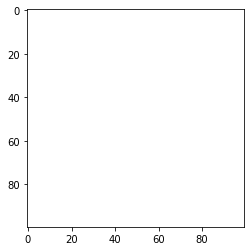

In [15]:
plt.imshow(cutout.data)

In [20]:
pix = w.world_to_pixel(coord)

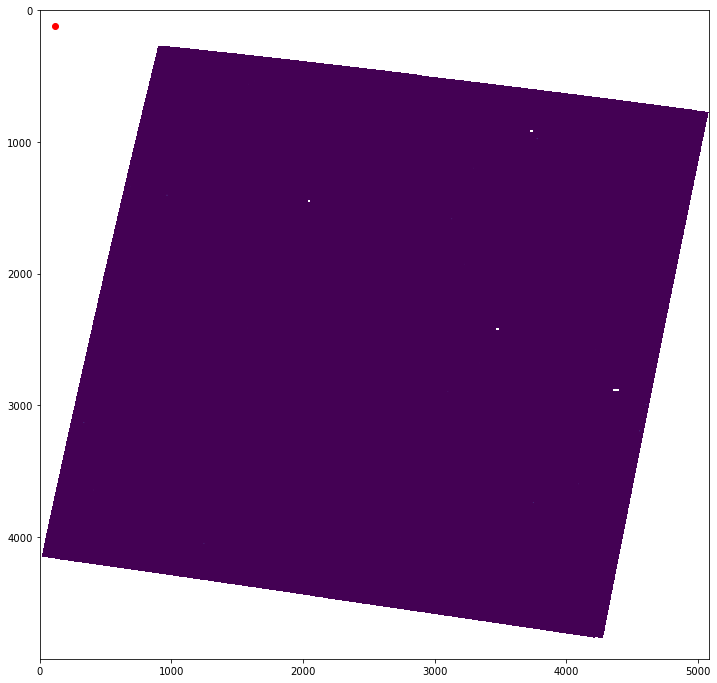

In [21]:
plt.figure(figsize=(12,12))
plt.imshow(data)
plt.scatter(pix[1],pix[1],color='red')

In [28]:
if len(cutout.data[np.isnan(cutout.data)]) > 0.5*(cutout.data.shape[1]*cutout.data.shape[0]):
    print('Worked')

Worked
